<a href="https://colab.research.google.com/github/dote7ant/Univariate_Bivariate_Multivariate_analysis_in_R/blob/master/R_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# what its about 

## Introduction

## 1. Reading the data and importing required libraries

In [25]:
# install ggplot
install.packages("ggplot2")
require(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2



In [1]:
# install data table
install.packages("data.table")
require(data.table)

# load the data set 
url = "http://bit.ly/IPAdvertisingData"
df <- fread(url)

# preview the data set 
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: data.table



Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


## 2. Check the data 

In [2]:
# find the first 5 rows
head(df, 5)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
# check the last 5 rows
tail(df, 5)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


We observe that from the head and tail of the dataset that we can see the time spent on the site, topic within the blog, city, gender, country, date, age and the area income for a particular area. And we see whether an ad was clicked or not.

In [4]:
# find the column names
print(names(df))

 [1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"           


We will want to remove the spaces between the column names shown above and have them be lower case

In [5]:
# check type of data set
class(df)

[1] "data.table" "data.frame"

In [6]:
# find the column data types 
str(df)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Most of the columns are numeric with 4 of them being non numeric.

In [8]:
# find out how many rows and columns are present in the data set
dim(df)

[1] 1000   10

There are 1000 rows and 10 columns

In [12]:
# check if there are any duplicates
anyDuplicated(df)

[1] 0

There are no duplicate values

In [14]:
# check if there are any missing values
colSums(is.na(df))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

No missing values

## 3. Tidying up the data

In [18]:
# change column names to lower case 
colnames(df) <- tolower(colnames(df))
colnames(df)

[1] "daily time spent on site" "age"                     
 [3] "area income"              "daily internet usage"    
 [5] "ad topic line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked on ad"

In [49]:
# replace the white space with an underscore
colnames(df)  <- sub(" ", "_", colnames(df) )

In [50]:
# confirm the names have been converted 
print(names(df))

 [1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"           


Success!!!

We will now check for outliers and remove them if any. This will be for the numerical columns only.

In [64]:
install.packages("dplyr")                            # Install dplyr
library("dplyr")               

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [65]:
data <- select_if(df, is.numeric)             # Subset numeric columns with dplyr
data

daily_time_spent_on_site,age,area_income,daily_internet_usage,male,clicked_on_ad
<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0
88.91,33,53852.85,208.36,0,0
66.00,48,24593.33,131.76,1,1
74.53,30,68862.00,221.51,1,0


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: ignored

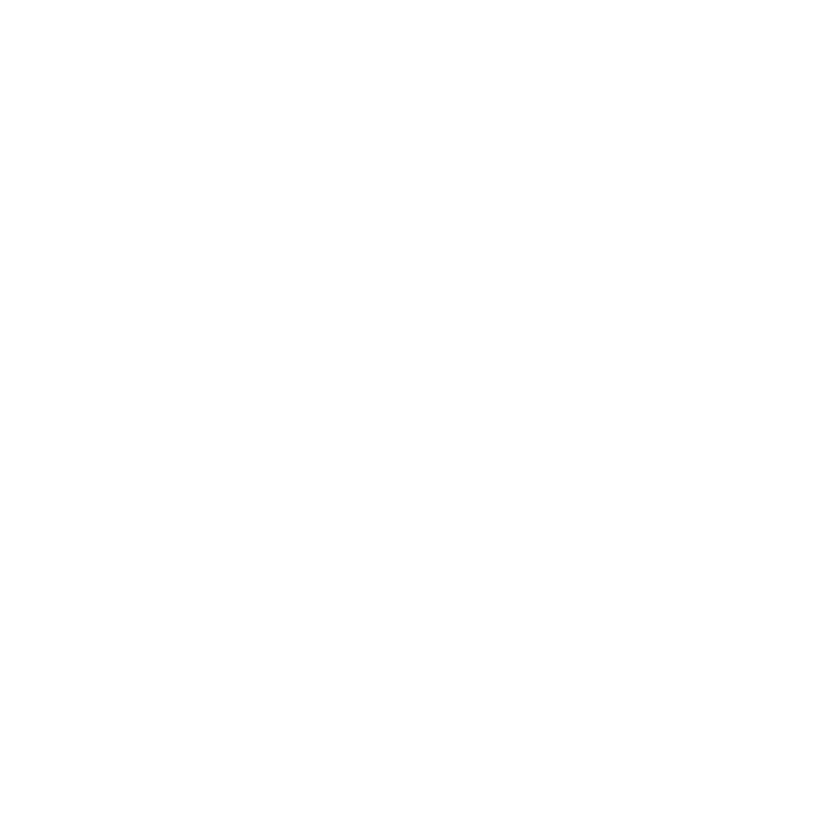

In [83]:
columns = colnames(select(data))

for (column in seq(length(colnames(data)))){
    boxplot(columns[column])
    print(columns[column])
   
}

In [76]:
# ouliers with ggplot2
library(ggplot2)
a = ggplot(df, aes(daily_time_spent_on_site, country, col = clicked_on_ad)) + 
    geom_boxplot() 


In [ ]:
a

In [38]:
# print out the outlier
boxplot.stats(df$`daily_time spent on site`)$out

numeric(0)

In [39]:
# print out the outlier
boxplot.stats(df$`daily_internet usage`)$out

numeric(0)

In [40]:
# print out the outlier
boxplot.stats(df$age)$out

integer(0)

In [41]:
# print out the outlier
boxplot.stats(df$area_income)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

In [ ]:
for i in 

## 4. Exploratory Data analysis

### a. Univariate analysis

In [86]:
# get the summary statistics
summary(df)

 daily_time_spent_on_site      age         area_income    daily_internet_usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 ad_topic_line          city                male         country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

Above we can observe the mean, median, first and third quantiles, minimum number and maximum number. The table below shows the data in a more organized format.

In [89]:
# function to get the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [91]:
ad_mode <- getmode(df)
print(ad_mode)

   daily_time_spent_on_site age area_income daily_internet_usage
1:                    68.95  35     61833.9               256.09
                        ad_topic_line        city male country
1: Cloned 5thgeneration orchestration Wrightburgh    0 Tunisia
             timestamp clicked_on_ad
1: 2016-03-27 00:53:11             0


#### Variance 

This is the measure of how far a set of numbers are spread out from their average value.

In [93]:
# find the variance for age
va_data <- var(data$age)
print(va_data)

[1] 77.18611


In [95]:
# find the variance for the area income
va_data <- var(data$area_income)
print(va_data)

[1] 179952406


In [96]:
# find the variance for clicked on ad
va_data <- var(data$clicked_on_ad)
print(va_data)

[1] 0.2502503


In [97]:
# find the variance for daily internet usage
va_data <- var(data$daily_internet_usage)
print(va_data)

[1] 1927.415


In [98]:
# find the variance for daily time spent on site
va_data <- var(data$daily_time_spent_on_site)
print(va_data)

[1] 251.3371


In [99]:
# find the variance for gender
va_data <- var(data$male)
print(va_data)

[1] 0.2498889


#### Standard Deviation 

This is the square root of the variance.


In [101]:
# find the standard deviation for age
std_data_age <- sd(data$age)
print(std_data_age)

[1] 8.785562


In [102]:
# find the standard deviation for the area income
std_data_income <- sd(data$area_income)
print(std_data_income)

[1] 13414.63


In [103]:
# find the standard deviation for clicked on ad
std_data_click <- sd(data$clicked_on_ad)
print(std_data_click)

[1] 0.5002502


In [104]:
# find the standard deviation for daily internet usage
std_data_usage <- sd(data$daily_internet_usage)
print(std_data_usage)

[1] 43.90234


In [105]:
# find the standard deviation for daily time spent on site
std_data_time <- sd(data$daily_time_spent_on_site)
print(std_data_time)

[1] 15.85361


In [106]:
# find the standard deviation for gender
std_data_gender <- sd(data$male)
print(std_data_gender)

[1] 0.4998889


### b. Bivariate analysis

### c. Multivariate analysis

## 5. Solution

## 6. Challenge the solution

## 7. Conclusion

## 8. Recommendation

## 9. Follow up questions